# **Personality Detection (Extrovert/Introvert)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


**Preprocessing**

<Axes: xlabel='Personality', ylabel='count'>

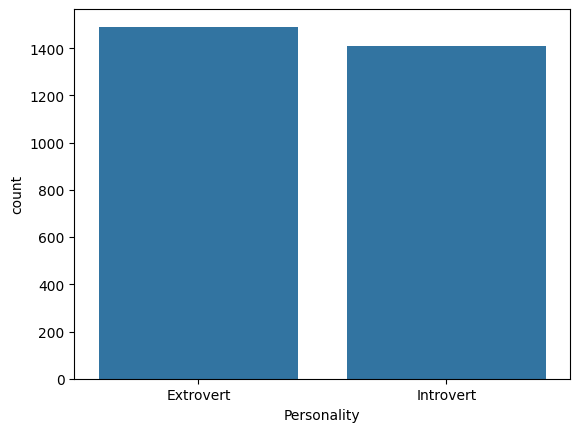

In [ ]:
sn.countplot(df,x='Personality')

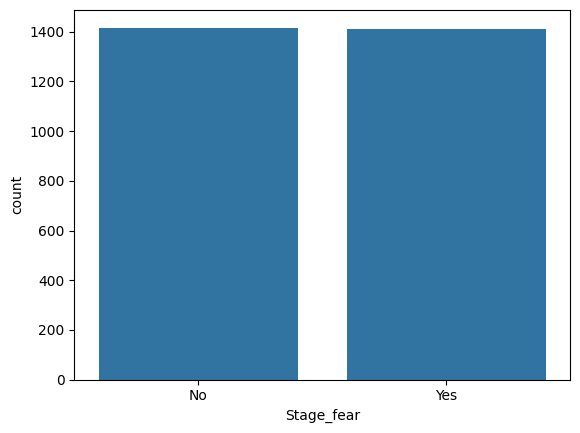

In [ ]:
sn.countplot(df,x='Stage_fear')
plt.show()

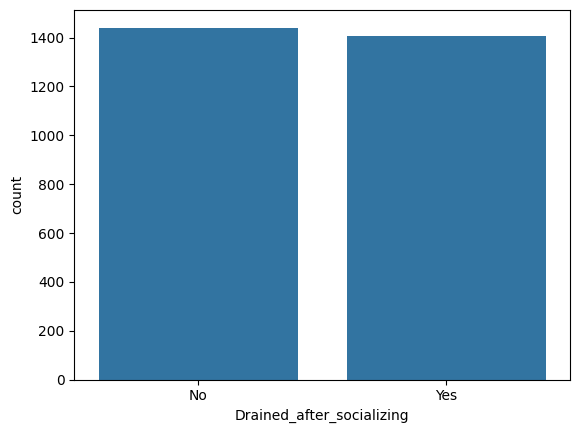

In [ ]:
sn.countplot(df,x='Drained_after_socializing')
plt.show()

In [ ]:
df.isna().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [ ]:
df.shape

(2900, 8)

In [ ]:
df.dtypes

,0
Time_spent_Alone,float64
Stage_fear,object
Social_event_attendance,float64
Going_outside,float64
Drained_after_socializing,object
Friends_circle_size,float64
Post_frequency,float64
Personality,object


In [ ]:
label_encoder=preprocessing.LabelEncoder()
df['Personality']=label_encoder.fit_transform(df['Personality'])

In [ ]:
df['Drained_after_socializing']=df['Drained_after_socializing'].replace({'No':0,'Yes':1})
df['Stage_fear']=df['Stage_fear'].replace({'No':0,'Yes':1})

/tmp/ipython-input-943137289.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Drained_after_socializing']=df['Drained_after_socializing'].replace({'No':0,'Yes':1})
/tmp/ipython-input-943137289.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stage_fear']=df['Stage_fear'].replace({'No':0,'Yes':1})


In [ ]:
df['Time_spent_Alone']=df['Time_spent_Alone'].fillna((df['Time_spent_Alone'].mean()))
df['Social_event_attendance']=df['Social_event_attendance'].fillna((df['Social_event_attendance'].mean()))
df['Going_outside']=df['Going_outside'].fillna((df['Going_outside'].mean()))
df['Friends_circle_size']=df['Friends_circle_size'].fillna((df['Friends_circle_size'].mean()))
df['Post_frequency']=df['Post_frequency'].fillna((df['Post_frequency'].mean()))
df['Stage_fear']=df['Stage_fear'].fillna((df['Stage_fear'].mean()))
df['Drained_after_socializing']=df['Drained_after_socializing'].fillna((df['Drained_after_socializing'].mean()))

In [ ]:
df.isna().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [ ]:
df.dtypes

,0
Time_spent_Alone,float64
Stage_fear,float64
Social_event_attendance,float64
Going_outside,float64
Drained_after_socializing,float64
Friends_circle_size,float64
Post_frequency,float64
Personality,int64


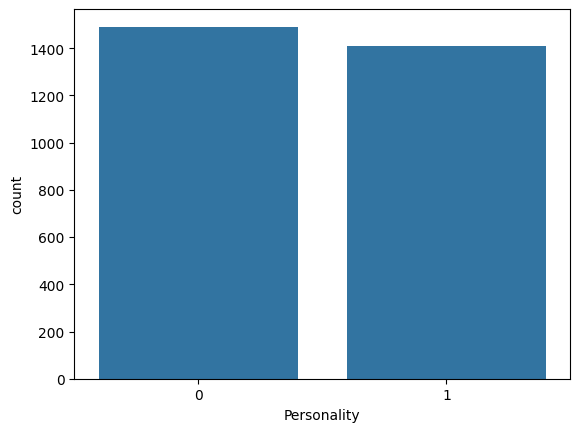

In [ ]:
sn.countplot(df,x='Personality')
plt.show()

* 0 -> Extrovert
* 1 -> Introvert

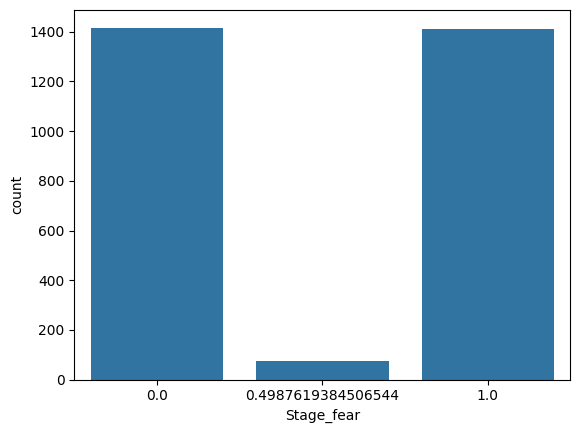

In [ ]:
sn.countplot(df,x='Stage_fear')
plt.show()

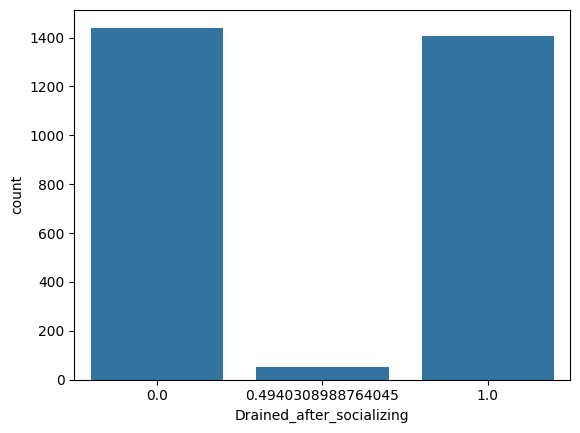

In [ ]:
sn.countplot(df,x='Drained_after_socializing')
plt.show()

* No -> 0
* Yes -> 1

In [ ]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,1
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,1
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,0


**Train Test Split**

In [ ]:
x=df.drop(columns='Personality')
x.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0


In [ ]:
y=df['Personality']
y.head()

,Personality
0,0
1,1
2,1
3,0
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=11)

**Model Selection**

In [ ]:
LR_score=cross_val_score(LogisticRegression(),X=x,y=y,cv=5)
DT_score=cross_val_score(DecisionTreeClassifier(),X=x,y=y,cv=5)
KN_score=cross_val_score(KNeighborsClassifier(),X=x,y=y,cv=5)
RF_score=cross_val_score(RandomForestClassifier(),X=x,y=y,cv=5)
Ada_score=cross_val_score(AdaBoostClassifier(),X=x,y=y,cv=5)
GB_score=cross_val_score(GradientBoostingClassifier(),X=x,y=y,cv=5)
XG_score=cross_val_score(XGBClassifier(),X=x,y=y,cv=5)
svm_score=cross_val_score(SVC(),X=x,y=y,cv=5)
NB_score=cross_val_score(BernoulliNB(),X=x,y=y,cv=5)

In [ ]:
print(f'Logistic Regression : {np.round(np.mean(LR_score)*100,2)}%')
print(f'Decision Tree : {np.round(np.mean(DT_score)*100,2)}%')
print(f'KNN : {np.round(np.mean(KN_score)*100,2)}%')
print(f'Random Forest : {np.round(np.mean(RF_score)*100,2)}%')
print(f'AdaBoost : {np.round(np.mean(Ada_score)*100,2)}%')
print(f'Gradient Boost : {np.round(np.mean(GB_score)*100,2)}%')
print(f'XG Boost : {np.round(np.mean(XG_score)*100,2)}%')
print(f'SVM : {np.round(np.mean(svm_score)*100,2)}%')
print(f'Naive Bayes : {np.round(np.mean(NB_score)*100,2)}%')

Logistic Regression : 93.41%
Decision Tree : 86.69%
KNN : 92.72%
Random Forest : 91.62%
AdaBoost : 92.83%
Gradient Boost : 93.1%
XG Boost : 91.69%
SVM : 93.45%
Naive Bayes : 93.45%


* Logistic Regression : 93.41%
* Gradient Boost : 93.1%
* SVM : 93.45%
* Naive Bayes : 93.45%


In [ ]:
gb=GradientBoostingClassifier()
gb_params=[{'max_depth':list(range(2,7)),'learning_rate':[i/100 for i in range(1,21)]}] #(0.01-0.2)

In [ ]:
clf=GridSearchCV(gb,gb_params,cv=5,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'learning_rate': 0.01, 'max_depth': 2}
0.9344827586206896


{'learning_rate': 0.01, 'max_depth': 2}
0.9344827586206896

In [ ]:
s=SVC()
s_params=[{'kernel':['poly','rbf','sigmoid','linear'],'C':[0.01,0.1,1,10,100]}]

In [ ]:
clf=GridSearchCV(s,s_params,cv=5,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'C': 0.01, 'kernel': 'rbf'}
0.9344827586206896


{'C': 0.01, 'kernel': 'rbf'}
0.9344827586206896

**Model Evaluation**

In [ ]:
LR_model=LogisticRegression()
LR_model.fit(x_train,y_train)
LR_model.score(x_test,y_test)*100

93.27586206896552

In [ ]:
GB_model=GradientBoostingClassifier(learning_rate=0.01,max_depth=2)
GB_model.fit(x_train,y_train)
GB_model.score(x_test,y_test)*100

93.44827586206897

In [ ]:
svm=SVC(C=0.01)
svm.fit(x_train,y_train)
svm.score(x_test,y_test)*100

93.44827586206897

In [ ]:
NB_model=BernoulliNB()
NB_model.fit(x_train,y_train)
NB_model.score(x_test,y_test)*100

93.44827586206897

**Model Fixing**

In [ ]:
final_model=BernoulliNB()
final_model.fit(x_train,y_train)

pred_y=final_model.predict(x_test)
pred_y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,

In [ ]:
a=final_model.score(x_test,y_test)
print(f'Accuracy of the model : {np.round((a*100),2)}%')

Accuracy of the model : 93.45%


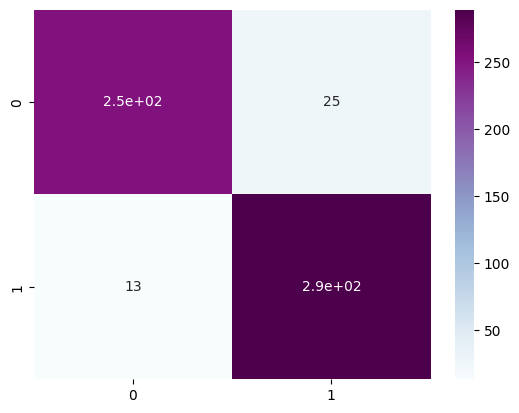

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True,cmap='BuPu')
plt.show()

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.95      0.91      0.93       278\n           1       0.92      0.96      0.94       302\n\n    accuracy                           0.93       580\n   macro avg       0.94      0.93      0.93       580\nweighted avg       0.94      0.93      0.93       580\n'

In [ ]:
mse=mean_squared_error(y_test,pred_y)
print(f'{mse:.2f}')

0.07


 **Deployment**

In [ ]:
Time_spent_Alone=int(input('Enter the time you spend alone:'))
Stage_fear=int(input('Do you have stage fear [yes(1)/no(0)] ?:'))
Social_event_attendance=int(input('How often do you attend social events (0-10) ?:'))
Going_outside=int(input('How often do you go outside (0-10) ?:'))
Drained_after_socializing=int(input('Do you get drained after socializing [yes(1)/no(0)] ?:'))
Friends_circle_size=int(input('How large is your friend cycle ?:'))
Post_frequency=int(input('How often do you post ?:'))
l=[Time_spent_Alone,Stage_fear,Social_event_attendance,Social_event_attendance,Drained_after_socializing,Friends_circle_size,Post_frequency]
a=pd.DataFrame([l],columns=x_train.columns)
p=final_model.predict(a)
if p==0:
  print("You're an Extrovert!")
else:
  print("You're an Introvert!")

Enter the time you spend alone:8
Do you have stage fear [yes(1)/no(0)] ?:1
How often do you attend social events (0-10) ?:7
How often do you go outside (0-10) ?:8
Do you get drained after socializing [yes(1)/no(0)] ?:0
How large is your friend cycle ?:15
How often do you post ?:4
You're an Extrovert!
